# Export and import of FOB, CIF, Packages and Weight per month and year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import seaborn as sns

### How much we import and export from everything by year?

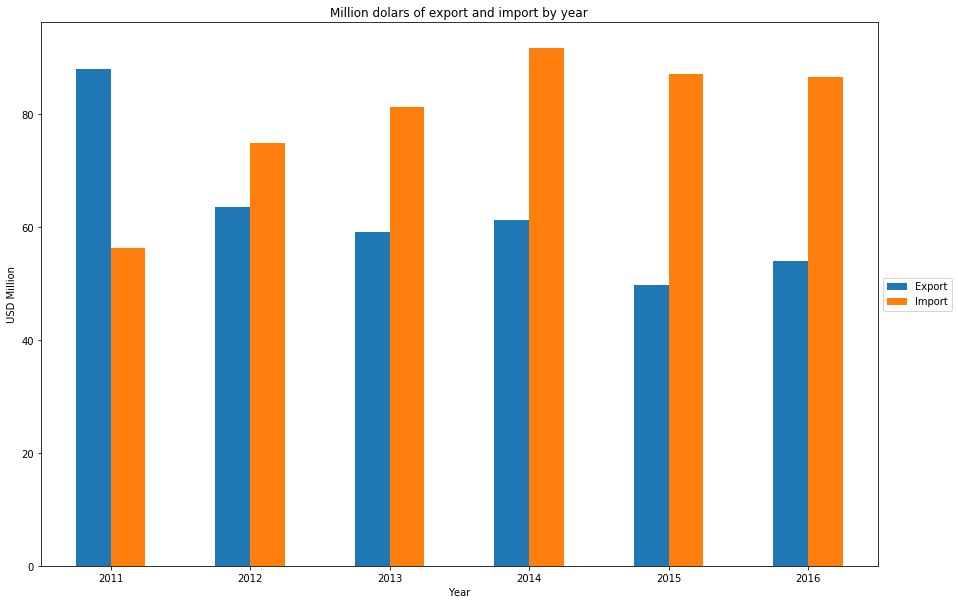

TYPE       Export       Import
YEAR                          
2011  87902763.20  56298948.70
2012  63489772.60  74800266.45
2013  59059207.23  81241189.81
2014  61312003.60  91677274.02
2015  49745925.77  87119961.23
2016  53984026.11  86529224.41

In [24]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"

usecols_export =  ["YEAR", "TOTALVALORFOB"]
usecols_import =  ["YEAR", "CIF"]

data_import = pd.read_csv(filename_import, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data

data_import["TYPE"] = "Import"
data_export["TYPE"] = "Export"

data_export.columns = ['', 'YEAR', 'TYPE']

data_import.columns = ['', 'YEAR', 'TYPE']

final_data = pd.concat([data_import, data_export])
final_data = final_data[final_data["YEAR"] != 2017]


# Group by data
new_data_grouper = final_data.groupby(["YEAR", 'TYPE']).sum()

plot = new_data_grouper.unstack().plot(kind='bar',figsize=(15, 10))

plot.set_title("Million dolars of export and import by year")
plot.set_xlabel("Year")
plot.set_ylabel("USD Million")

plot.legend(["Export","Import"], loc='center left', bbox_to_anchor=(1.0, 0.5))

plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")
plot.set_yticklabels(["0", "20", "40", "60", "80"])

plt.show()
new_data_grouper.unstack()

### How much we import from everything by month?

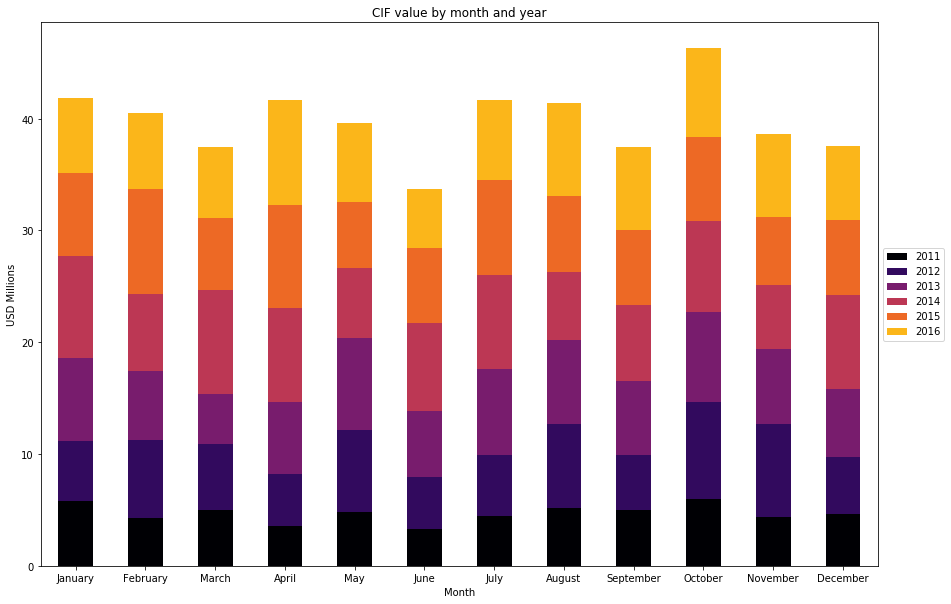

CIF                                                            
YEAR         2011        2012        2013        2014        2015        2016
MONTH                                                                        
1      5788826.23  5390142.53  7425242.24  9086683.71  7446918.24  6682989.51
2      4258901.06  7023524.47  6151110.28  6889484.24  9367644.79  6822076.78
3      5002774.74  5853021.06  4487453.87  9338368.71  6442432.00  6316859.95
4      3527406.52  4657493.18  6442853.00  8465647.26  9137682.21  9399125.26
5      4849164.79  7334784.70  8166651.89  6298692.18  5856676.69  7089862.08
6      3334255.05  4589594.77  5937640.67  7892044.24  6668873.34  5297046.20
7      4409952.99  5463302.99  7711901.70  8443542.90  8456135.51  7185575.28
8      5193046.69  7447225.82  7553920.69  6089394.61  6811595.54  8277305.19
9      4999181.88  4907330.60  6584974.58  6855663.63  6647981.30  7427199.22
10     5930777.57  8684726.66  8059574.88  8135478.22  7528820.45  7969281.56
11     4392551.12  8335881.56  6647939.72  5753182.87  6092934.89  7375218.19
12     4612110.06  5113238.11  6071926.29  8429091.45  6662266.27  6686685.19

In [25]:
filename = "data" + os.sep + "import" + os.sep + "all_import_with_group.txt"
usecols =  ["YEAR", "MONTH", "CIF"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)
data = data[data["YEAR"] != 2017]
new_data_grouper = data.groupby(['MONTH','YEAR']).sum()

plot = new_data_grouper.unstack().plot(kind='bar', 
                                       stacked=True, 
                                       figsize=(15, 10),
                                       color=plt.cm.inferno(np.linspace(0, 1, 7)))

plot.set_title("CIF value by month and year")
plot.set_xlabel("Month")
plot.set_ylabel("USD Millions")

plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"],
            loc='center left', bbox_to_anchor=(1.0, 0.5))

plot.set_xticklabels(["January","February","March","April", "May", "June", "July",
                      "August", "September", "October", "November", "December"],
                     rotation="horizontal")

large = len(plot.get_yticklabels()) - 1
plot.set_yticklabels([str(int(x)) for x in np.linspace(0, (large - 1)*10, large)])

plt.show()

new_data_grouper.unstack()

### How much we export from everything by month?

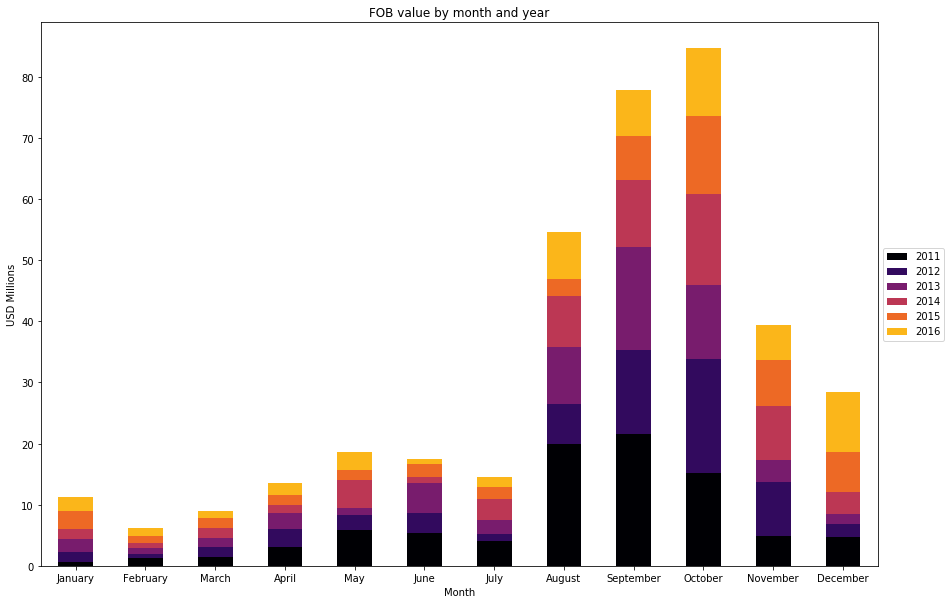

TOTALVALORFOB                                                      \
YEAR           2011         2012         2013         2014         2015   
MONTH                                                                     
1         633771.50   1598329.59   2107086.84   1749256.18   2826904.04   
2        1337215.21    530419.08   1121136.62    754229.17   1200749.60   
3        1408616.86   1603930.50   1505338.47   1674661.66   1550145.06   
4        3044967.48   2936756.11   2630774.97   1251567.52   1679910.47   
5        5889633.49   2340735.05   1260529.97   4584001.56   1674119.22   
6        5398158.40   3273384.70   4850286.89    971998.41   2226285.47   
7        4088699.59   1113580.63   2223747.27   3578765.44   1888158.65   
8       19864016.86   6564086.86   9359389.84   8399137.00   2720110.10   
9       21494991.08  13796944.70  16885464.19  10843772.35   7241610.15   
10      15127931.23  18701970.20  12041836.54  14989421.46  12631399.33   
11       4860530.13   8865570.96   3528337.71   8910464.53   7522042.59   
12       4754231.37   2164064.22   1545277.92   3604728.32   6584491.09   

                    
YEAR          2016  
MONTH               
1       2332053.99  
2       1253094.90  
3       1276412.12  
4       1987707.48  
5       2867808.67  
6        820890.13  
7       1599692.48  
8       7664470.31  
9       7628626.58  
10     11183759.07  
11      5675800.49  
12      9693709.89

In [26]:
filename = "data" + os.sep + "export" + os.sep + "all_export_with_group.txt"
usecols =  ["YEAR", "MONTH", "TOTALVALORFOB"]

data = pd.read_csv(filename, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols)


data = data[data["YEAR"] != 2017]
new_data_grouper = data.groupby(['MONTH','YEAR']).sum()

plot = new_data_grouper.unstack().plot(kind='bar', 
                                       stacked=True, 
                                       figsize=(15, 10),
                                       color=plt.cm.inferno(np.linspace(0, 1, 7)))

plot.set_title("FOB value by month and year")
plot.set_xlabel("Month")
plot.set_ylabel("USD Millions")

plot.legend(["2011","2012","2013","2014", "2015", "2016", "2017"],
            loc='center left', bbox_to_anchor=(1.0, 0.5))

plot.set_xticklabels(["January","February","March","April", "May", "June", "July",
                      "August", "September", "October", "November", "December"],
                     rotation="horizontal")

large = len(plot.get_yticklabels()) - 1
plot.set_yticklabels([str(int(x)) for x in np.linspace(0, (large - 1)*10, large)])
plt.show()

new_data_grouper.unstack()


# FALTA TITULO

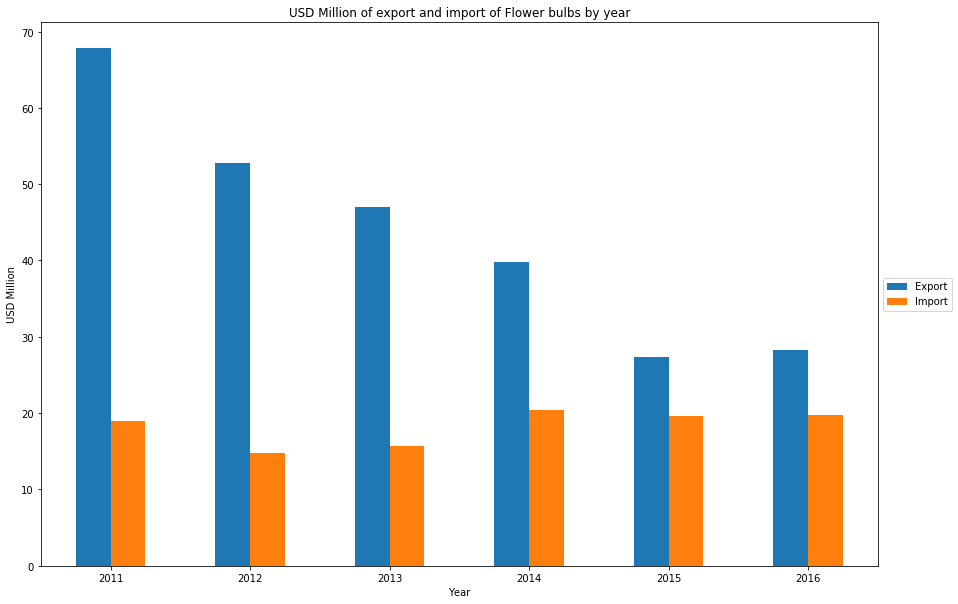

                              
TYPE       Export       Import
YEAR                          
2011  67828989.90  18909243.40
2012  52814289.75  14824201.89
2013  46952111.71  15635266.45
2014  39792691.63  20389765.19
2015  27362985.61  19646835.20
2016  28287807.41  19736597.77


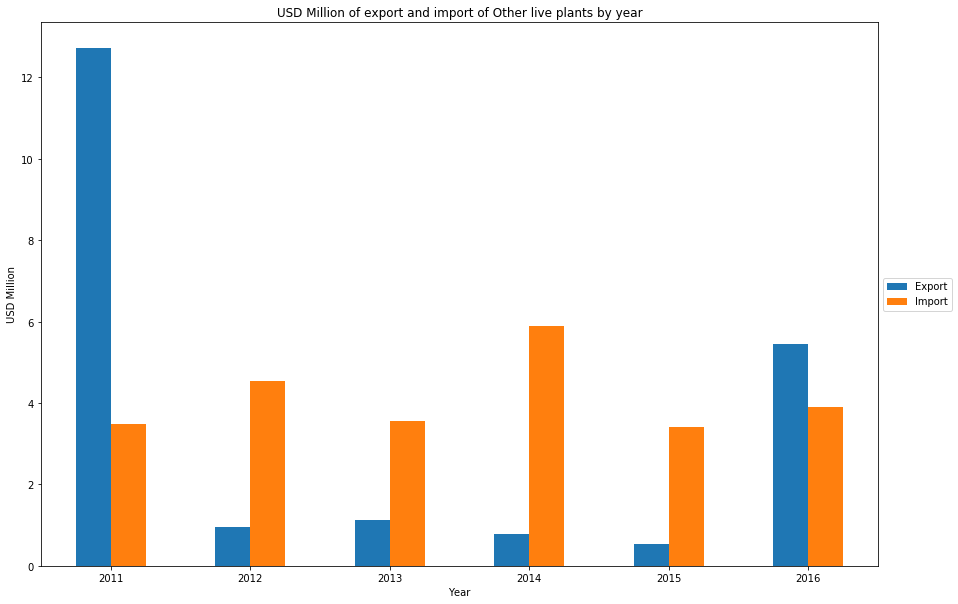

                             
TYPE       Export      Import
YEAR                         
2011  12718317.39  3489740.30
2012    963112.94  4528957.97
2013   1127622.68  3564692.02
2014    782600.99  5900182.69
2015    546503.76  3413689.69
2016   5440133.79  3894023.26


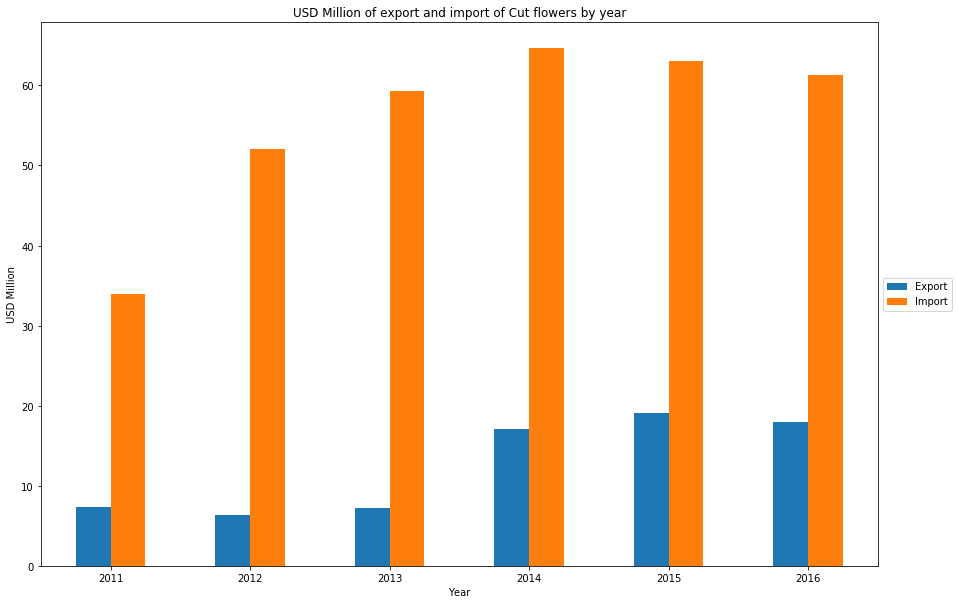

                              
TYPE       Export       Import
YEAR                          
2011   7355455.91  33899965.00
2012   6312940.84  52058971.07
2013   7171605.25  59264660.17
2014  17136033.21  64656404.18
2015  19031371.19  62987933.19
2016  17917244.46  61313283.32


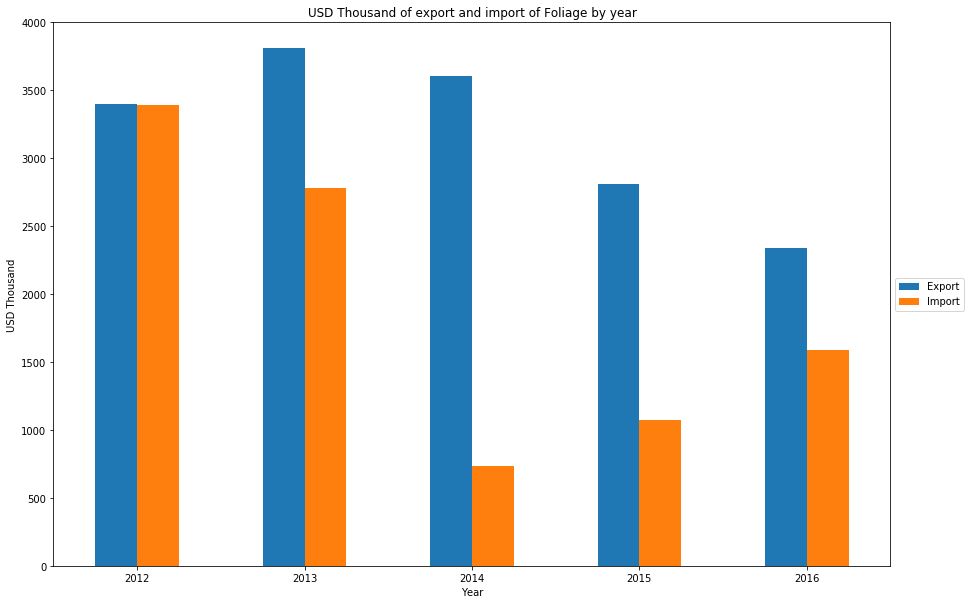

                            
TYPE      Export      Import
YEAR                        
2012  3399429.07  3388135.52
2013  3807867.59  2776571.17
2014  3600677.77   730921.96
2015  2805065.21  1071503.15
2016  2338840.45  1585320.06


In [27]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR", "TOTALVALORFOB", "GROUP"]
usecols_import =  ["YEAR", "CIF", "GROUP"]

data_import = pd.read_csv(filename_import, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data

data_import["TYPE"] = "Import"
data_export["TYPE"] = "Export"

data_export.columns = ['', 'YEAR',"GROUP", 'TYPE']

data_import.columns = ['', 'YEAR',"GROUP", 'TYPE']

final_data = pd.concat([data_import, data_export])
final_data = final_data[final_data["YEAR"] != 2017]

for group, scale,text in [("Flower bulbs",      np.linspace(0, 70, 8), "Million"),
                          ("Other live plants", np.linspace(0, 12, 7),  "Million"),
                          ("Cut flowers",       np.linspace(0, 60, 7),  "Million"),
                          ("Foliage",           np.linspace(0, 4000, 9),  "Thousand")]:
    
    temporal_data = final_data[final_data["GROUP"] == group]


    # Group by data
    new_data_grouper = temporal_data.groupby(["YEAR", 'TYPE']).sum()

    plot = new_data_grouper.unstack().plot(kind='bar',figsize=(15, 10))

    plot.set_title("USD {} of export and import of {} by year".format(text, group))
    plot.set_xlabel("Year")
    plot.set_ylabel("USD {}".format(text))

    plot.legend(["Export","Import"], loc='center left', bbox_to_anchor=(1.0, 0.5))

    plot.set_xticklabels(plot.get_xticklabels(), rotation="horizontal")

    plot.set_yticklabels([str(int(x)) for x in scale])

    plt.show()
    print(new_data_grouper.unstack().to_string())

# FALTA TITULO

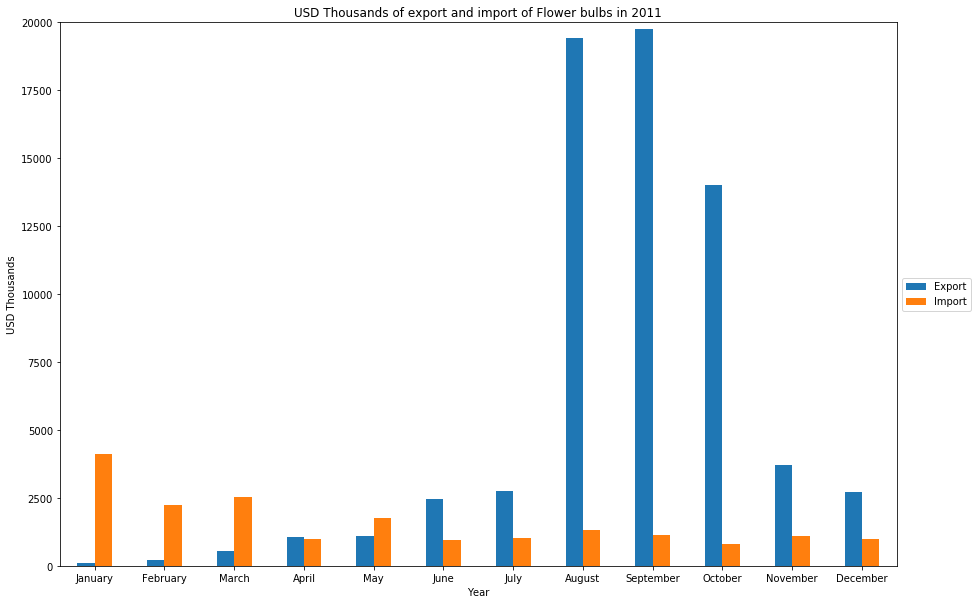

                              
TYPE        Export      Import
MONTH                         
1        109359.26  4107453.09
2        214696.82  2231282.54
3        542863.92  2529171.18
4       1057427.99   998374.99
5       1095211.53  1747558.98
6       2451311.93   939026.04
7       2769774.63  1008977.46
8      19404673.17  1325674.37
9      19750238.81  1120781.88
10     14027748.05   811898.46
11      3695169.07  1087007.23
12      2710514.72  1002037.18


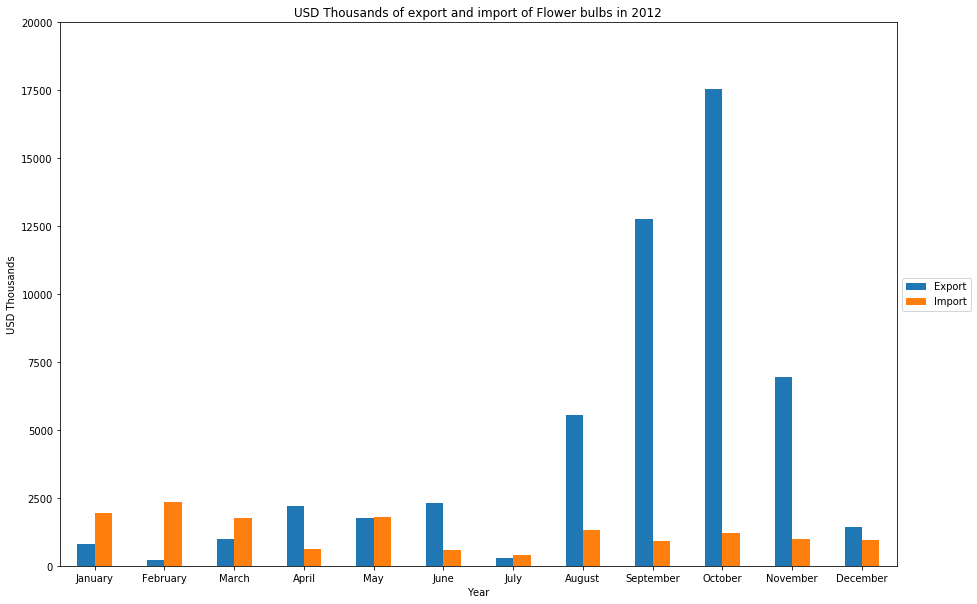

                              
TYPE        Export      Import
MONTH                         
1        798348.93  1934042.24
2        218256.73  2349672.44
3        980235.75  1776088.99
4       2192950.12   634156.90
5       1748003.46  1804068.28
6       2318499.62   593733.59
7        303106.31   381110.18
8       5562626.75  1301521.08
9      12776447.22   927542.73
10     17524114.96  1189062.97
11      6946169.09  1000570.51
12      1445530.81   932631.98


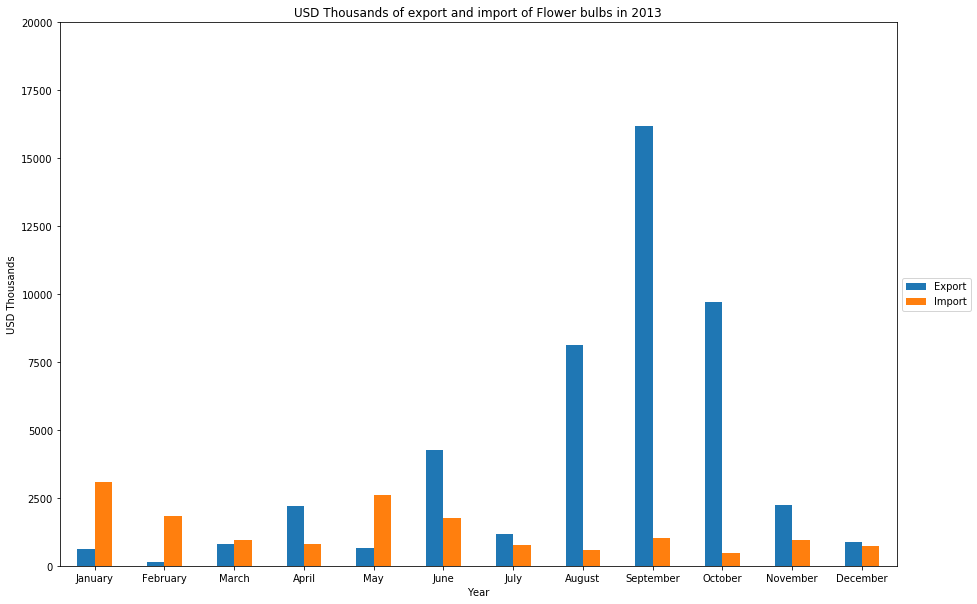

                              
TYPE        Export      Import
MONTH                         
1        618258.48  3073409.83
2        130573.70  1841579.62
3        818131.23   965431.18
4       2193185.68   813465.03
5        654966.16  2592299.98
6       4248276.02  1770237.12
7       1163805.60   768316.01
8       8140748.90   596656.27
9      16182207.46  1040426.69
10      9709876.82   475020.97
11      2229498.47   966089.21
12       862583.19   732334.54


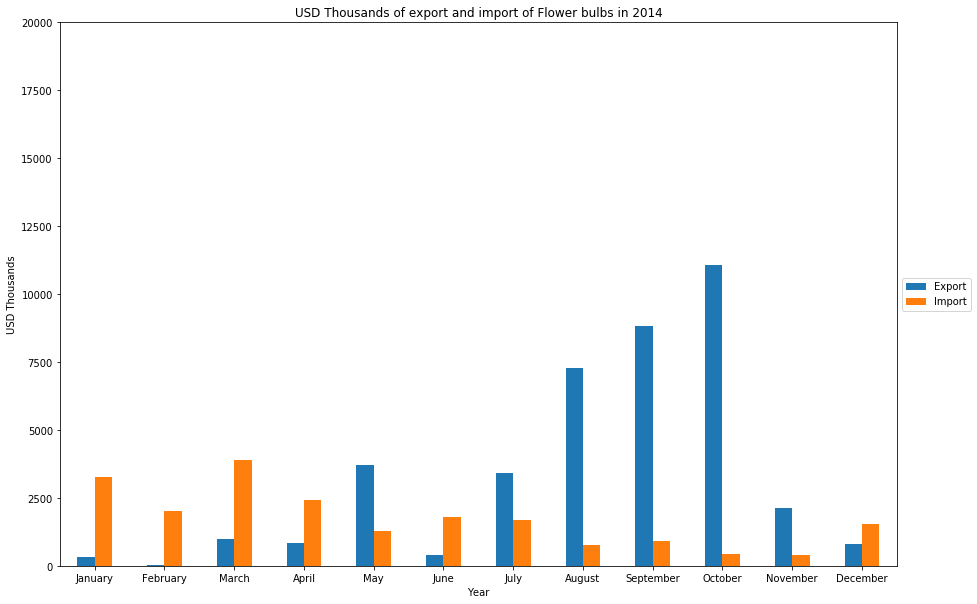

                              
TYPE        Export      Import
MONTH                         
1        319458.90  3259341.56
2         11697.61  2010562.21
3        977884.51  3908926.47
4        850554.14  2435317.40
5       3714395.79  1291645.46
6        404701.94  1781739.19
7       3422135.52  1687492.92
8       7279405.01   755487.28
9       8840721.92   915107.48
10     11071556.83   423480.81
11      2108276.04   385320.01
12       791903.42  1535344.40


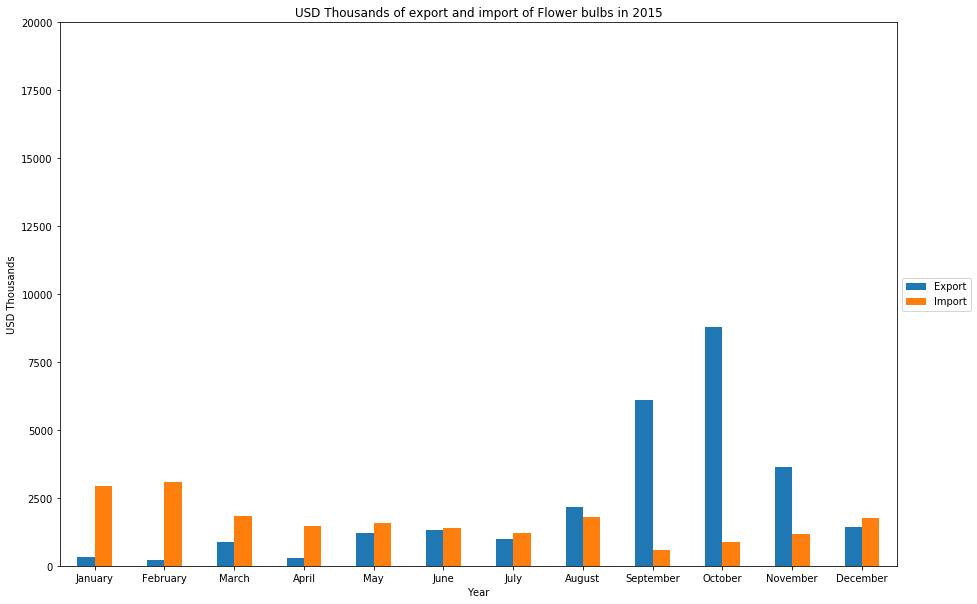

                             
TYPE       Export      Import
MONTH                        
1       333557.96  2939880.89
2       211450.80  3076777.19
3       889103.46  1823045.84
4       272090.20  1477690.21
5      1219748.41  1557694.18
6      1323523.51  1397195.33
7       995059.94  1201164.36
8      2170047.78  1787333.14
9      6081746.62   596377.73
10     8785735.18   857604.39
11     3646048.69  1172286.98
12     1434873.06  1759784.96


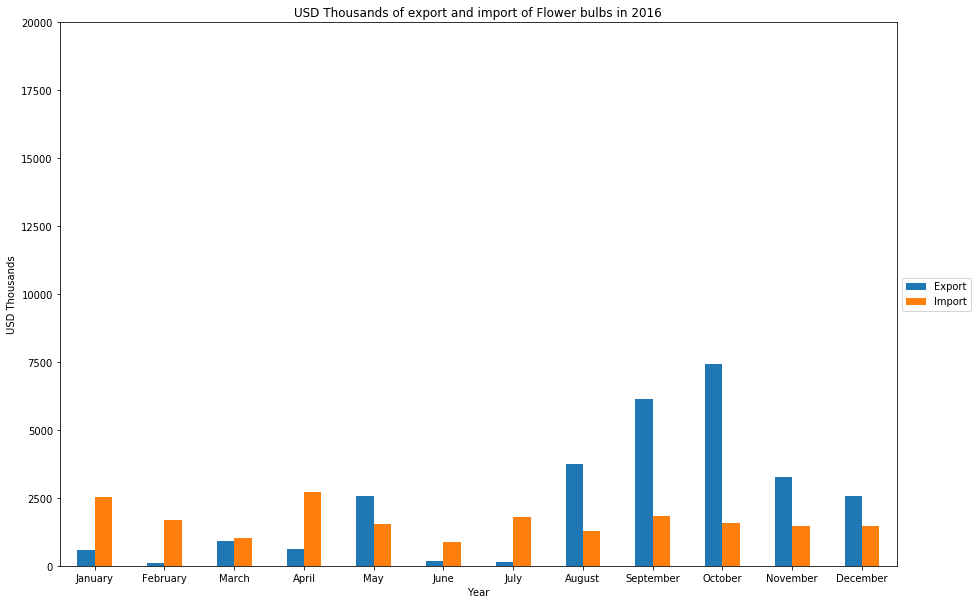

                             
TYPE       Export      Import
MONTH                        
1       594066.49  2534217.88
2       111724.29  1674316.83
3       925634.59  1015984.86
4       601686.32  2703036.47
5      2568010.35  1542132.69
6       165790.09   869623.20
7       141999.52  1794196.97
8      3763064.36  1271925.16
9      6144837.14  1845588.73
10     7423052.15  1572259.33
11     3276061.71  1466371.44
12     2571880.40  1446944.21


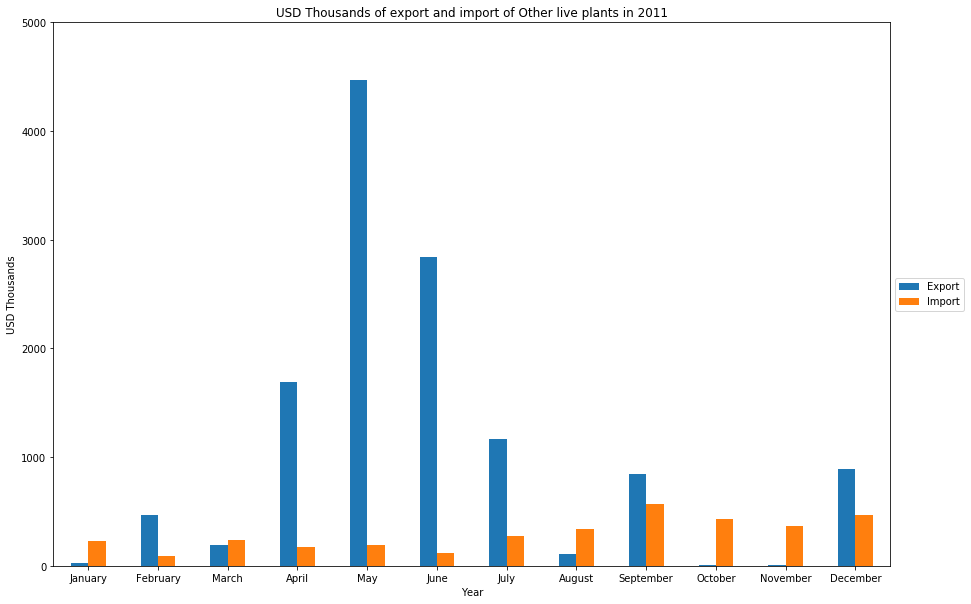

                            
TYPE       Export     Import
MONTH                       
1        29353.51  225669.46
2       467485.45   91259.36
3       193241.54  234263.45
4      1693149.54  176923.60
5      4470684.73  192587.07
6      2840655.14  121313.02
7      1162479.83  270876.91
8       104882.68  341076.62
9       844997.13  569738.05
10        9802.75  426430.44
11       11285.09  369000.65
12      890300.00  470601.67


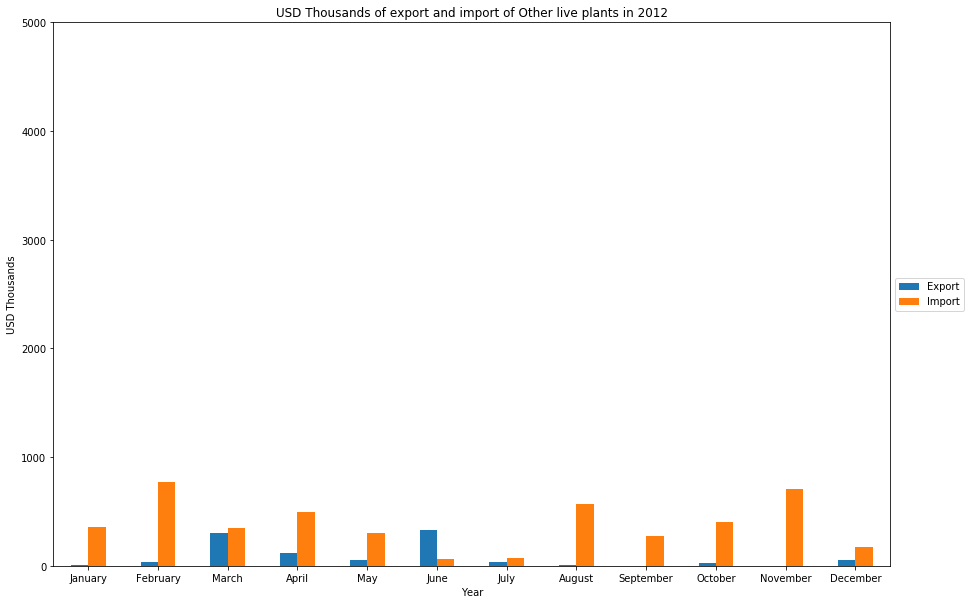

                           
TYPE      Export     Import
MONTH                      
1        4997.00  355244.23
2       34514.28  770412.66
3      299534.03  344819.26
4      113195.76  497773.62
5       55138.54  305524.27
6      326694.61   63082.07
7       32795.58   73480.33
8       11692.31  570726.91
9        1950.50  272635.76
10      25426.02  401086.12
11           NaN  704807.00
12      57174.31  169365.74


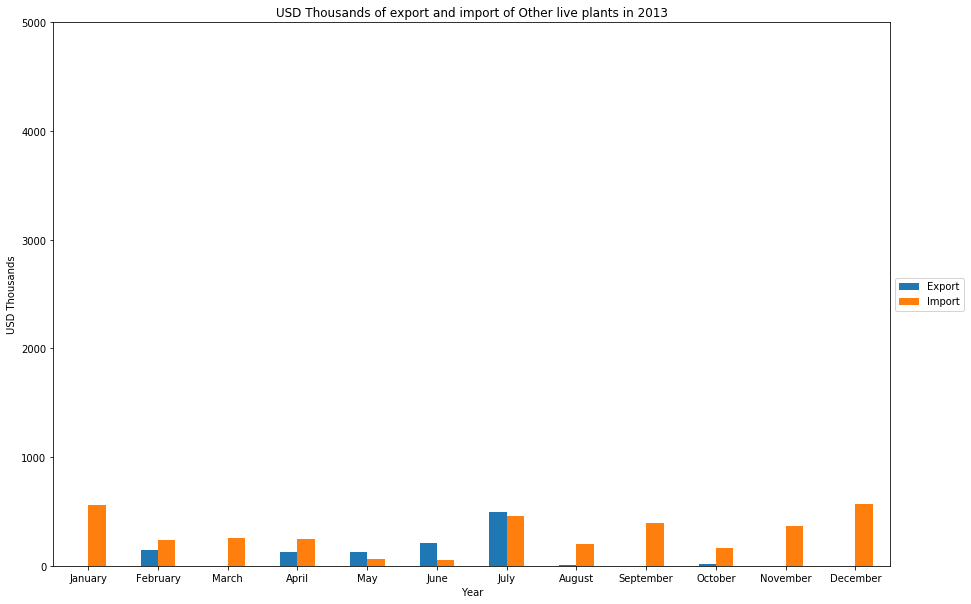

                           
TYPE      Export     Import
MONTH                      
1            NaN  561259.80
2      148512.85  236831.42
3            NaN  252284.76
4      128376.10  249741.90
5      128721.02   62111.74
6      209592.92   52117.85
7      492279.87  457085.90
8        4200.00  205094.08
9            NaN  390940.75
10      15939.92  160972.46
11           NaN  366917.26
12           NaN  569334.10


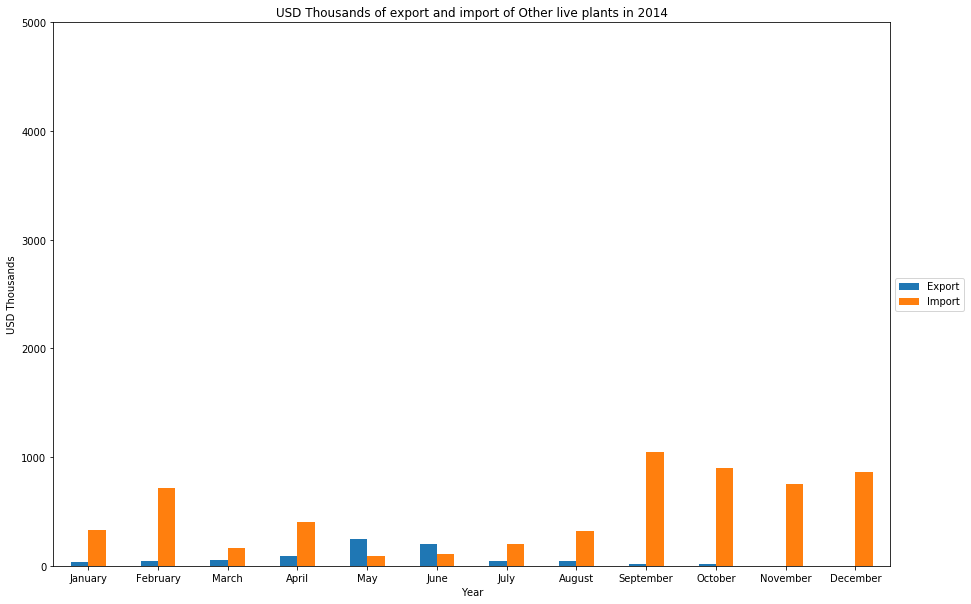

                            
TYPE      Export      Import
MONTH                       
1       36851.50   332789.96
2       41466.56   718216.46
3       50229.59   165250.87
4       93700.37   401138.61
5      243533.38    87983.43
6      202288.65   111261.14
7       41055.07   199361.67
8       42483.67   323452.16
9       13486.77  1045729.98
10      17505.43   896907.74
11           NaN   755531.01
12           NaN   862559.66


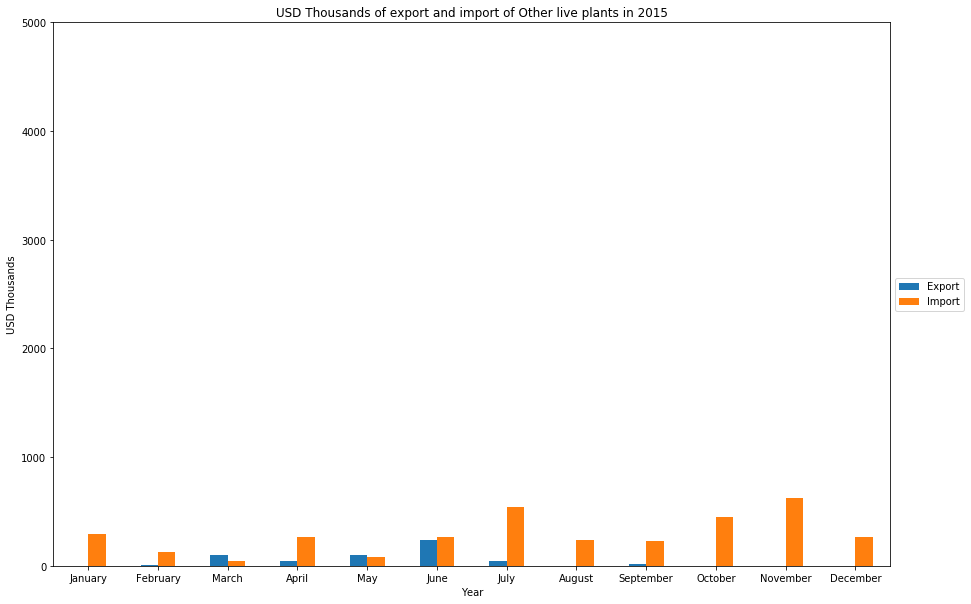

                           
TYPE      Export     Import
MONTH                      
1            NaN  290239.62
2        6209.80  125859.36
3       95358.90   45441.84
4       47803.77  266326.38
5       97834.72   85086.99
6      241737.37  262096.12
7       40862.83  538265.76
8            NaN  235063.43
9       16091.37  228552.77
10           NaN  448955.78
11           NaN  623013.77
12        605.00  264787.87


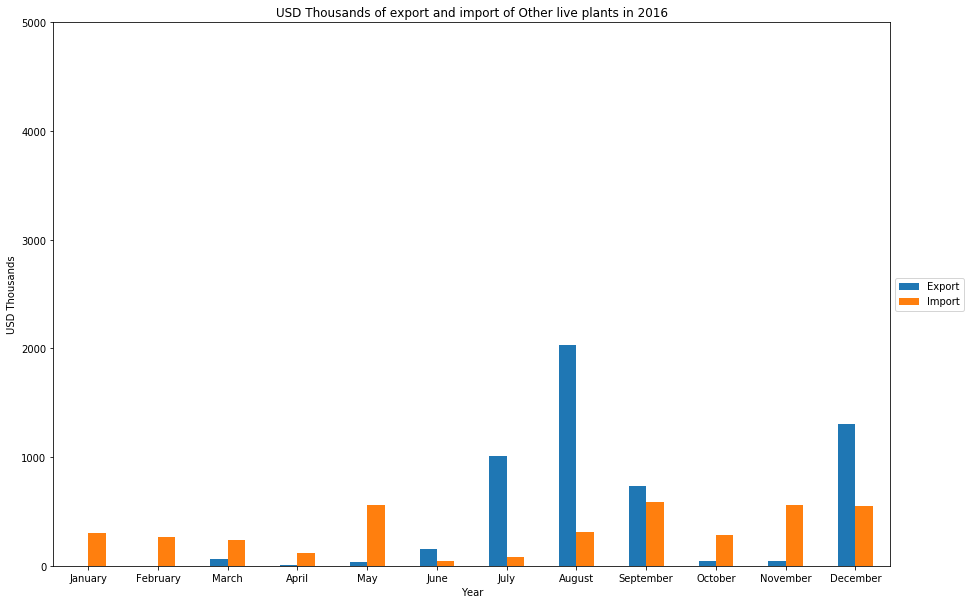

                            
TYPE       Export     Import
MONTH                       
1             NaN  304590.97
2             NaN  268563.86
3        62296.36  234808.57
4         2960.75  115739.12
5        36111.14  555017.02
6       158106.54   47106.77
7      1012840.96   83110.81
8      2033864.04  307608.55
9       736581.96  582728.91
10       46214.23  284939.54
11       48626.75  563398.70
12     1302531.06  546410.44


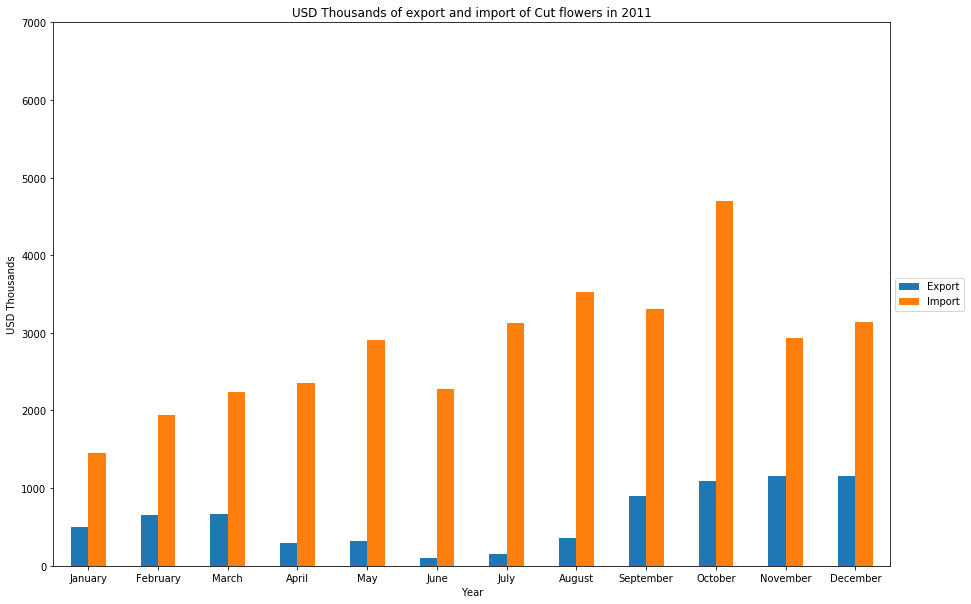

                             
TYPE       Export      Import
MONTH                        
1       495058.73  1455703.68
2       655032.94  1936359.16
3       672511.40  2239340.11
4       294389.95  2352107.93
5       323737.23  2909018.74
6       106191.33  2273915.99
7       156445.13  3130098.62
8       354461.01  3526295.70
9       899755.14  3308661.95
10     1090380.43  4692448.67
11     1154075.97  2936543.24
12     1153416.65  3139471.21


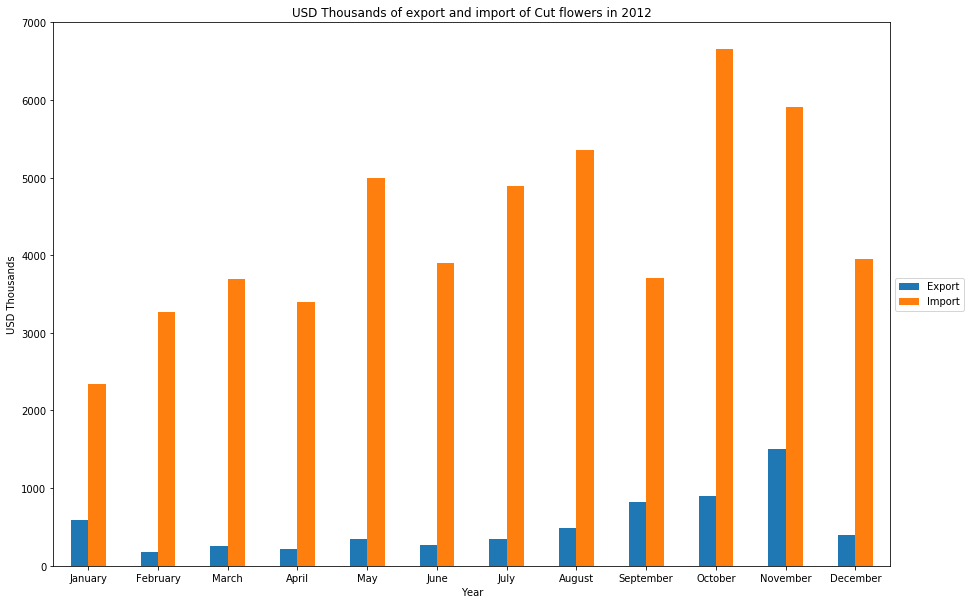

                             
TYPE       Export      Import
MONTH                        
1       592148.84  2343503.55
2       178936.59  3271551.56
3       253423.45  3694783.93
4       219299.60  3396020.34
5       348658.30  4993361.90
6       269010.05  3897648.09
7       338746.00  4886998.11
8       492922.55  5351879.67
9       820413.61  3706995.32
10      893690.49  6654178.77
11     1505851.75  5911894.68
12      399839.61  3950155.15


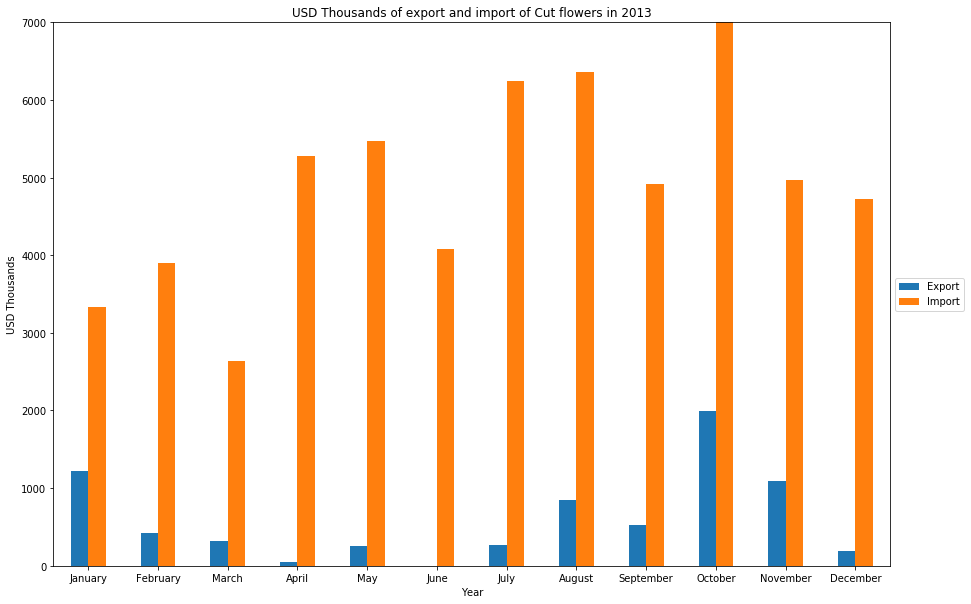

                             
TYPE       Export      Import
MONTH                        
1      1214541.01  3329556.39
2       424762.77  3904636.66
3       319345.41  2633565.16
4        47194.19  5278489.22
5       254649.00  5474173.17
6             NaN  4077424.75
7       263030.30  6244854.14
8       852717.10  6352961.57
9       526141.43  4920560.82
10     1987743.65  7362543.10
11     1089925.76  4963960.40
12      191554.63  4721934.79


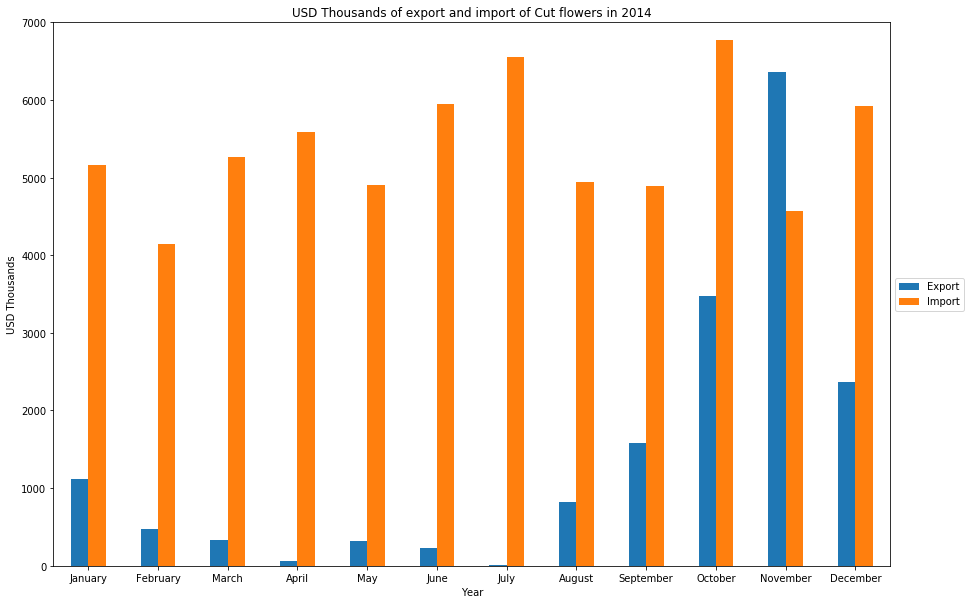

                             
TYPE       Export      Import
MONTH                        
1      1118389.72  5162035.44
2       472413.25  4138051.81
3       329906.56  5264191.37
4        57021.89  5580193.08
5       323006.91  4908974.98
6       226201.20  5950590.29
7        13651.50  6547052.96
8       815490.60  4944867.21
9      1577116.20  4888304.45
10     3475841.17  6776911.45
11     6354875.86  4574586.27
12     2372118.35  5920644.87


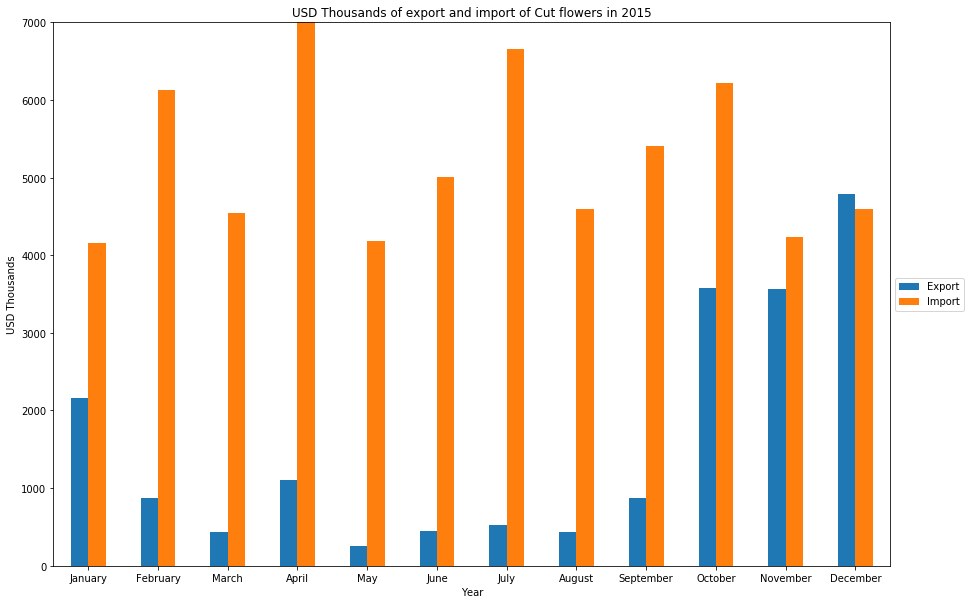

                             
TYPE       Export      Import
MONTH                        
1      2159014.24  4157018.62
2       870156.00  6127330.36
3       437619.64  4543018.78
4      1102698.00  7255568.86
5       260109.74  4188254.29
6       443142.46  5009581.89
7       520688.60  6658822.13
8       436793.00  4588528.65
9       867747.00  5406274.74
10     3581616.25  6215940.60
11     3565977.23  4236833.23
12     4785809.03  4600761.04


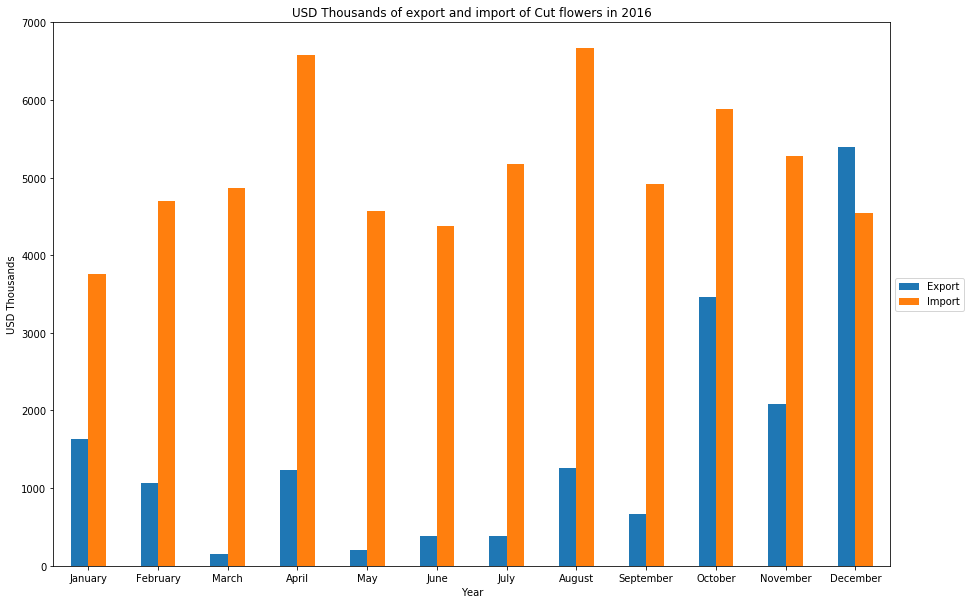

                             
TYPE       Export      Import
MONTH                        
1      1627807.50  3763762.22
2      1069653.61  4695922.42
3       157714.73  4865915.21
4      1229919.01  6571700.71
5       201734.12  4563371.99
6       378498.00  4380316.23
7       390165.00  5175845.54
8      1263188.40  6672098.50
9       664124.30  4917803.00
10     3457573.79  5877259.43
11     2080879.37  5280481.46
12     5395986.63  4548806.61


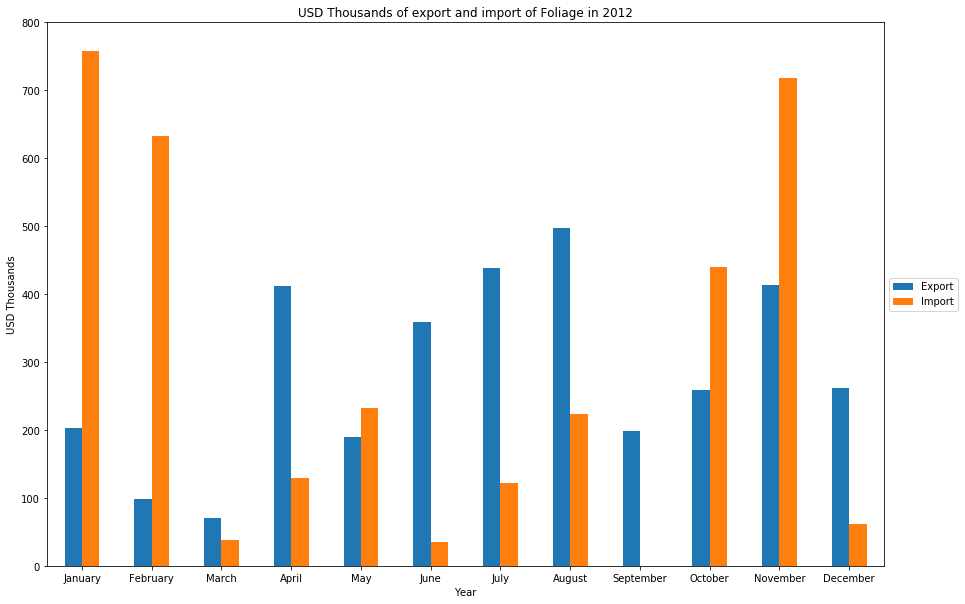

                           
TYPE      Export     Import
MONTH                      
1      202834.82  757352.51
2       98711.48  631887.81
3       70737.27   37328.88
4      411310.63  129542.32
5      188934.75  231830.25
6      359180.42   35131.02
7      438932.74  121714.37
8      496845.25  223098.16
9      198133.37     156.79
10     258738.73  440398.80
11     413550.12  718609.37
12     261519.49   61085.24


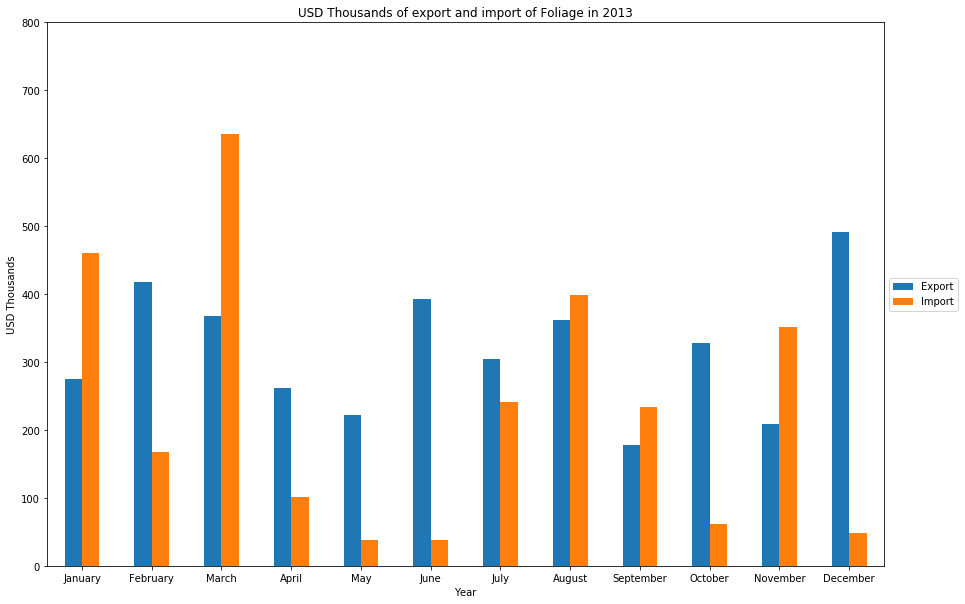

                           
TYPE      Export     Import
MONTH                      
1      274287.35  461016.22
2      417287.30  168062.58
3      367861.83  636172.77
4      262019.00  101156.85
5      222193.79   38067.00
6      392417.95   37860.95
7      304631.50  241645.65
8      361723.84  399208.77
9      177115.30  233046.32
10     328276.15   61038.35
11     208913.48  350972.85
12     491140.10   48322.86


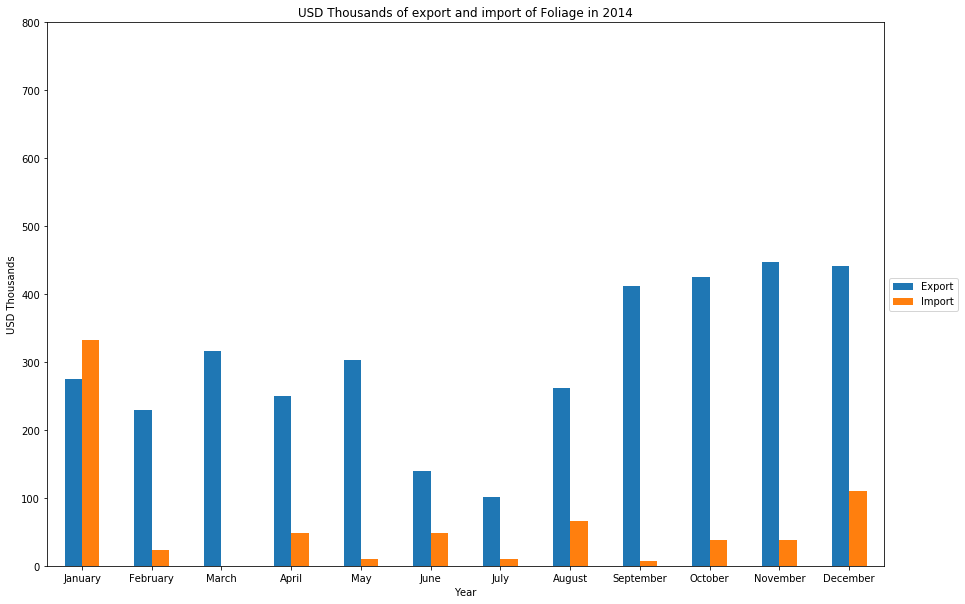

                           
TYPE      Export     Import
MONTH                      
1      274556.06  332516.75
2      228651.75   22653.76
3      316641.00        NaN
4      250291.12   48998.17
5      303065.48   10088.31
6      138806.62   48453.62
7      101923.35    9635.35
8      261757.72   65587.96
9      412447.46    6521.72
10     424518.03   38178.22
11     447312.63   37745.58
12     440706.55  110542.52


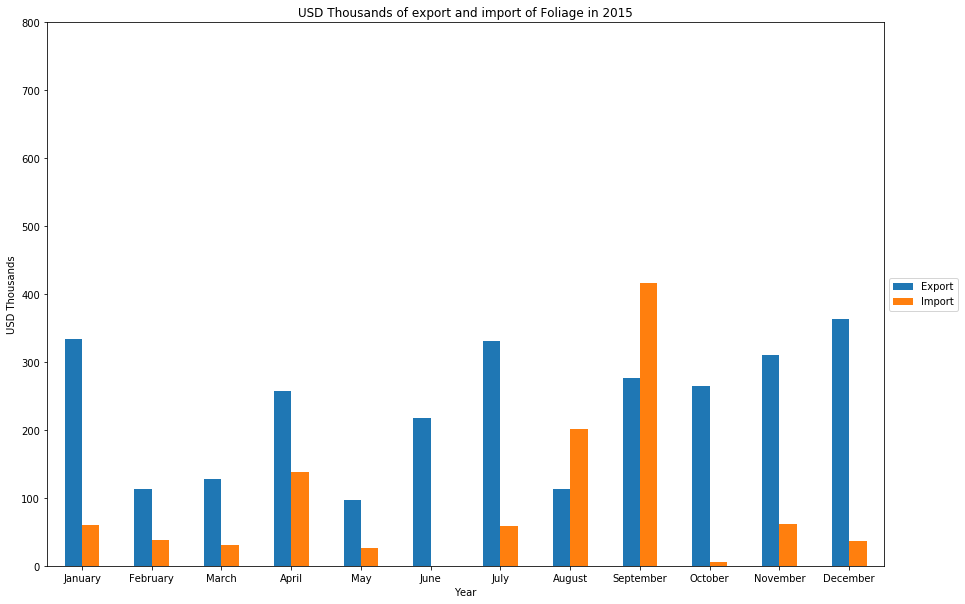

                           
TYPE      Export     Import
MONTH                      
1      334331.84   59779.11
2      112933.00   37677.88
3      128063.06   30925.54
4      257318.50  138096.76
5       96426.35   25641.23
6      217882.13        NaN
7      331547.28   57883.26
8      113269.32  200670.32
9      276025.16  416776.06
10     264047.90    6319.68
11     310016.67   60800.91
12     363204.00   36932.40


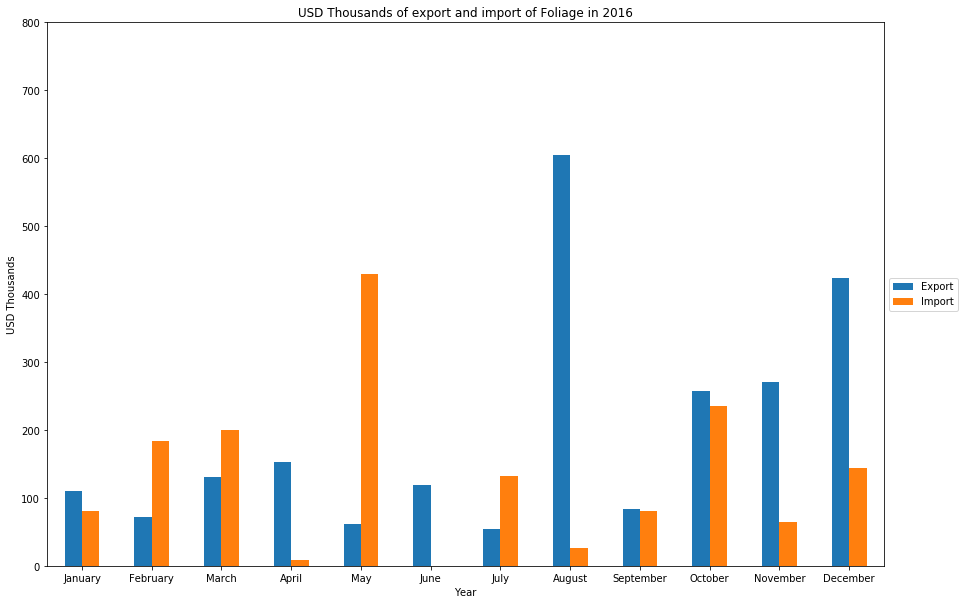

                           
TYPE      Export     Import
MONTH                      
1      110180.00   80418.44
2       71717.00  183273.67
3      130766.44  200151.31
4      153141.40    8648.96
5       61953.06  429340.38
6      118495.50        NaN
7       54687.00  132421.96
8      604353.51   25672.98
9       83083.18   81078.58
10     256918.90  234823.26
11     270232.66   64966.59
12     423311.80  144523.93


In [28]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR", "TOTALVALORFOB", "GROUP", 'MONTH']
usecols_import =  ["YEAR", "CIF", "GROUP", 'MONTH']

data_import = pd.read_csv(filename_import, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data

data_import["TYPE"] = "Import"
data_export["TYPE"] = "Export"

data_export.columns = ['', 'YEAR', 'MONTH',"GROUP", 'TYPE']

data_import.columns = ['', 'YEAR', 'MONTH',"GROUP", 'TYPE']

final_data = pd.concat([data_import, data_export])

final_data = final_data[final_data["YEAR"] != 2017]

for group, max_value, max_y, interval in [("Flower bulbs",        2*(10**7), 20000, 9),
                                          ("Other live plants", 0.5*(10**7),  5000, 6),
                                          ("Cut flowers",       0.7*(10**7),  7000, 8),
                                          ("Foliage",           0.8*(10**6),   800, 9)]:   
    
    temporal_data = final_data[final_data["GROUP"] == group]
    
    for year in range(2011, 2017):
        aux_data = temporal_data[temporal_data["YEAR"] == year]
        if not aux_data.empty:
            
            # Group by data
            new_data_grouper = aux_data[["MONTH", "TYPE", '']].groupby(["MONTH", 'TYPE']).sum()

            plot = new_data_grouper.unstack().plot(kind='bar',figsize=(15, 10))

            
            plot.set_title("USD Thousands of export and import of {} in {}".format(group, year))
            plot.set_xlabel("Year")
            plot.set_ylabel("USD Thousands")

            plot.legend(["Export","Import"], loc='center left', bbox_to_anchor=(1.0, 0.5))

            plot.set_xticklabels(["January","February","March","April", "May", "June", "July",
                          "August", "September", "October", "November", "December"],
                         rotation="horizontal")
            
            plot.set(ylim=(0, max_value))

            plot.set_yticklabels([str(int(x)) for x in np.linspace(0, max_y, interval)])

            plt.show()
            print(new_data_grouper.unstack().to_string())